# Haberman's Survival 

# Objective:

Survival of patients who had undergone surgery for breast cancer

In [2]:
#importing libaries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Reading data 
df=pd.read_csv(r"c:\haberman.csv") 
df.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [6]:
# Number of points
df.shape

(306, 4)

In [7]:
#Number of column names in above dataset
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [8]:
#Number of data points for each classe
df["status"].value_counts()
#This is imbalanced dataset

1    225
2     81
Name: status, dtype: int64

# 2-D Scatter Plot

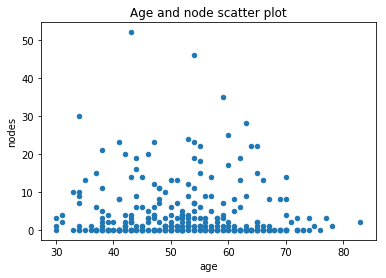

In [9]:
#2-D scatter plot
df.plot(kind='scatter',x= 'age', y='nodes')
plt.title("Age and node scatter plot")
plt.show()

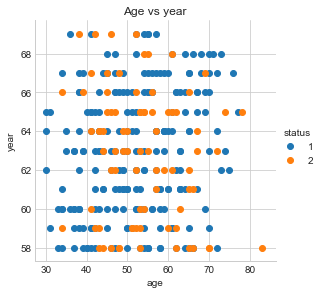

In [37]:
#2-D Scatter plot with color-coding for each class.
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="status",size=4)\
   .map(plt.scatter,"age","year")\
   .add_legend()
plt.title("Age vs year")
plt.show()


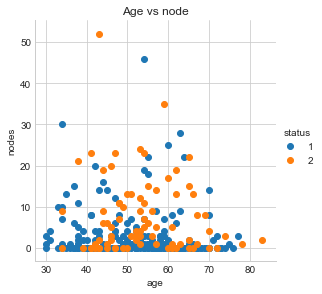

In [38]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="status",size=4)\
   .map(plt.scatter,"age","nodes")\
   .add_legend()
plt.title("Age vs node")
plt.show()

Observations: Notice that the above plot dead ratio is less then servived ratio.but both points are not seperable linearly.

# Pair-plot

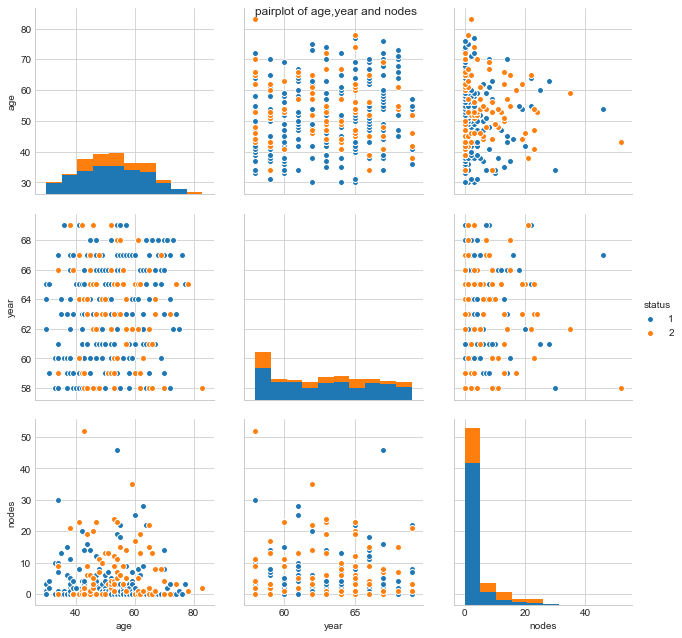

In [42]:
#pairwise scatter plot: Pair-Plot
#Here, we are generating pairplot for age,year,nodes.
sns.set_style("whitegrid")
sns.pairplot(df,hue="status",vars=['age','year','nodes'],size=3)
plt.suptitle("pairplot of age,year and nodes")
plt.show()

Observation:

By scattering the datapoints between theyear and node,we can see the better seperation between two classes compared to other plots

we can see the year of 60 and 65 range between more persons dead then servived.


# Univaraite analysis:

# Probability Density Functions (PDF)

C:\Users\chowds1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\chowds1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


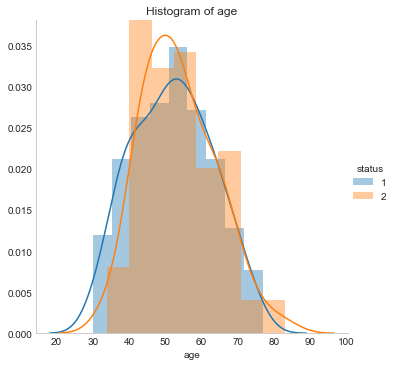

In [25]:
#1-D scatter plot of age
#PDF(Smoothing form of histogram)
sns.FacetGrid(df,hue="status",size=5)\
   .map(sns.distplot, "age")\
   .add_legend();
plt.grid()
plt.title("Histogram of age")
plt.plot();

    

C:\Users\chowds1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\chowds1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


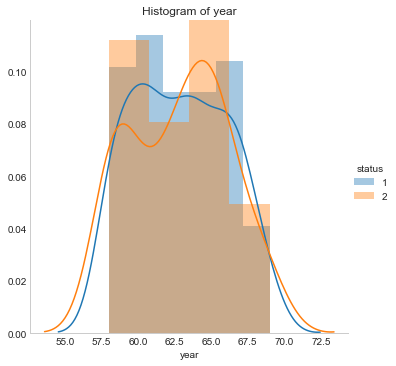

In [26]:
sns.FacetGrid(df,hue="status",size=5)\
   .map(sns.distplot, "year")\
   .add_legend();
plt.grid()
plt.title("Histogram of year")
plt.plot();

C:\Users\chowds1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\chowds1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


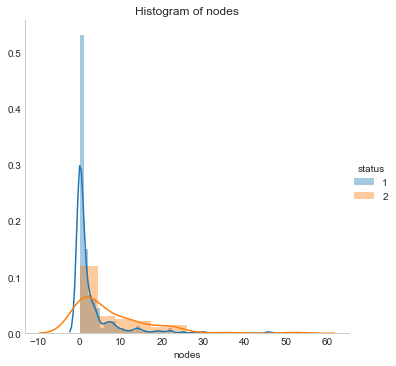

In [27]:
sns.FacetGrid(df,hue="status",size=5)\
   .map(sns.distplot, "nodes")\
   .add_legend();
plt.grid()
plt.title("Histogram of nodes")
plt.plot();

Observation:
  as above figures we can say that probability distribution function(PDF) of 1(servived) is high when compared to 2(dead).
    

# Cumulative Distribution Function (CDF)

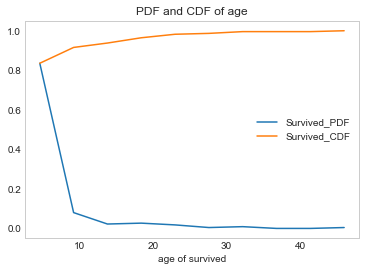

In [28]:
#plot cdf of age
df_surv=df.loc[df["status"]==1]
counts, bin_edges= np.histogram(df_surv['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age of survived")
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.grid()
plt.title("PDF and CDF of age")
plt.show()


Observation:From the above graph we can say that 100% of the 1 had less than 40 nodes dect.

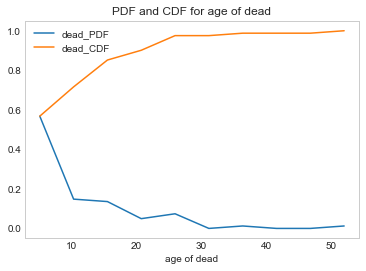

In [31]:
df_dead=df.loc[df["status"]==2]
counts, bin_edges= np.histogram(df_dead['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age of dead")
plt.legend(['dead_PDF', 'dead_CDF'])
plt.title("PDF and CDF for age of dead")
plt.grid()
plt.show()


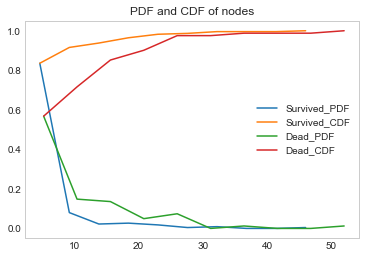

In [30]:
#plot cdf and pdf
counts, bin_edges= np.histogram(df_surv['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges= np.histogram(df_dead['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.grid()
plt.legend(['Survived_PDF', 'Survived_CDF','Dead_PDF', 'Dead_CDF'])
plt.title("PDF and CDF of nodes")
plt.show()


observation: From the above graph we can see the survival rate is extremely high compared to dead .

# Box plot and Whiskers

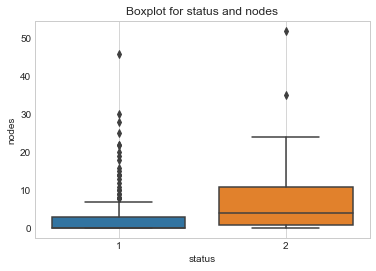

In [32]:
#Boxplots and whiskers
sns.boxplot(x='status', y='nodes', data=df)
plt.grid()
plt.title("Boxplot for status and nodes")
plt.show()

Observation:

Boxplot of 1 had only 75th percentile value at nodes dect is 2 and the 25th and 50th percentiles are overlapped.

Boxplot of 2 had 25th,and 50th,percentile value is classified into status of 1.
and 75th percentile value at node is 11.

# Violin plots

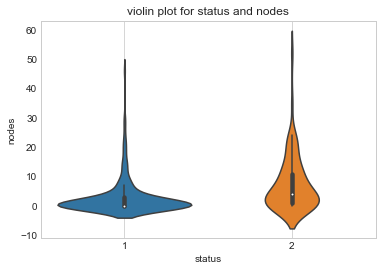

In [33]:
#violin plot
#This plot represents the histogram,pdf,boxplots.
sns.violinplot(x='status',y='nodes',data=df,size=5)
plt.grid()
plt.title("violin plot for status and nodes")
plt.show()

Observation:

50th percentile survivel have 0 nodes,25th percentile survivel have less then 0 nodes,75th percentile survivel have 3 nodes.
 
25th percentile dead have 1 nodes,50th percentile dead have 4 nodes,75th percentile dead have 12 nodes.
    

# Multivariate probability density, contour plot.

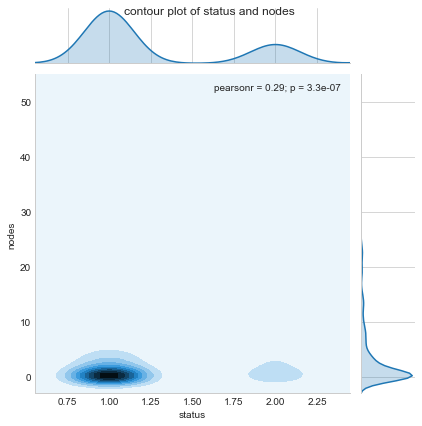

In [43]:
#contors plot
sns.jointplot(x='status',y='nodes',data=df,kind='kde')
plt.suptitle("contour plot of status and nodes")
plt.show()

# Conclusion:  

1.The above dataset is imbalanced dataset,it doesnot contain equal number of points from each class
    
2.There are too much overlapping in the data-points,it is not seperable for each classes
    
3.if number of node is less,then survival of patients is more
    
4.we need more features to classify.